In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE
import itertools
from tabulate import tabulate
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["normal", "anomaly"]

In [2]:
train=pd.read_csv('Train_data.csv')

In [3]:
test=pd.read_csv('Test_data.csv')

In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,normal,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [8]:
train.describe(include='float64')

,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train.describe(include='int64')

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,dst_host_count,dst_host_srv_count
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,182.532074,115.063036
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,98.993895,110.646850
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,84.000000,10.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,255.000000,61.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,255.000000,255.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,255.000000,255.000000


In [10]:
train.shape

(25192, 42)

In [11]:
test.shape

(22544, 41)

In [12]:
#Check Missing Values

In [13]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
#Calculate Percentage Of Missing Values For each column

In [15]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [16]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


In [17]:
#Visualization Of Data

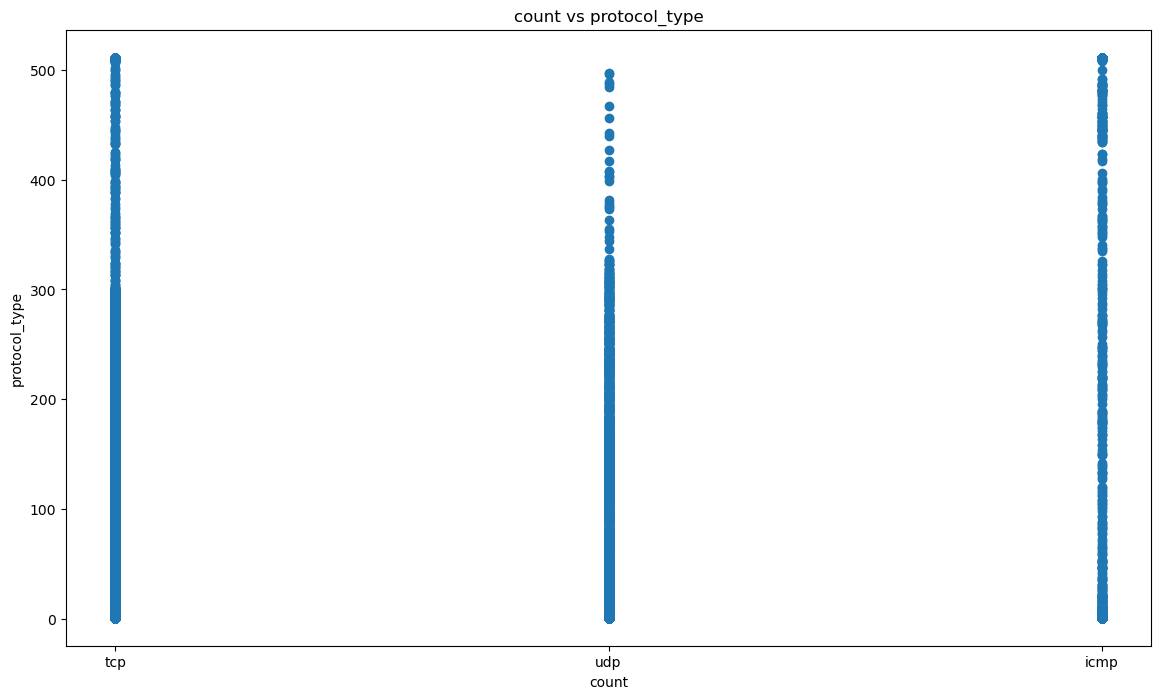

In [18]:
a_val=train['count']
b_val=train['protocol_type']
plt.scatter(b_val,a_val)
plt.xlabel('count')
plt.ylabel('protocol_type')
plt.title('count vs protocol_type')
plt.show()

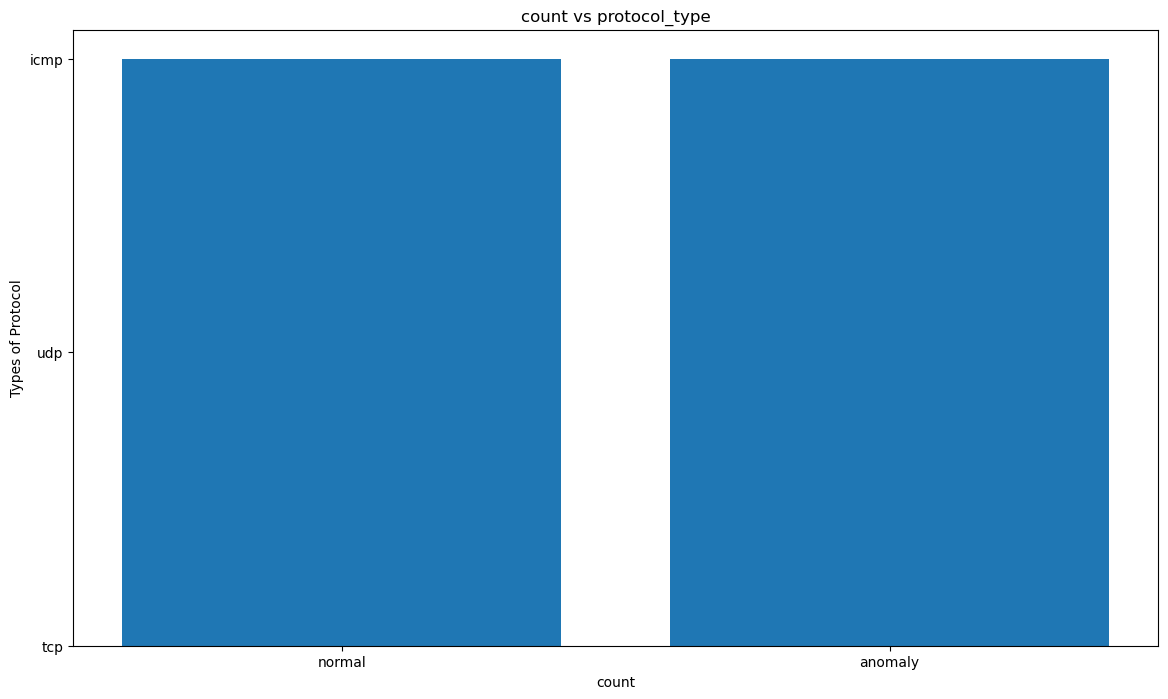

In [19]:
plt.bar(train['class'],train['protocol_type'])
plt.title('count vs protocol_type')
plt.xlabel('count')
plt.ylabel('Types of Protocol')
plt.show()

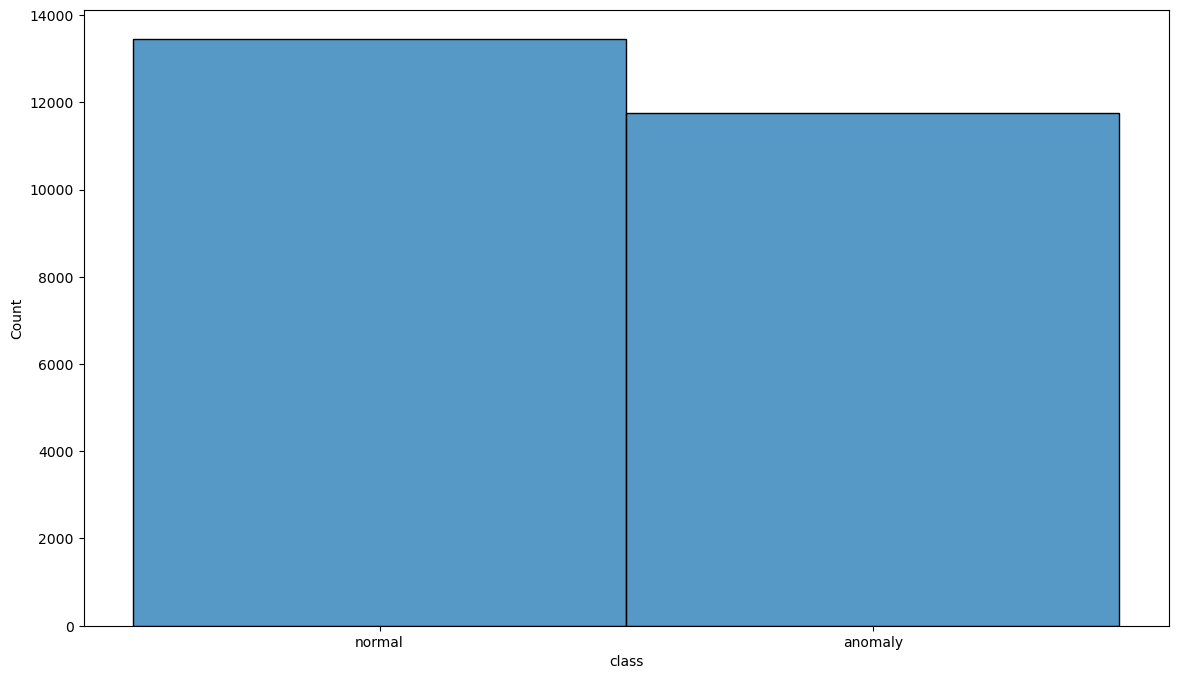

In [20]:
sns.histplot(x='class',data=train)
plt.show()

In [21]:
#Class (Normal or Anomaly)

<AxesSubplot:xlabel='class', ylabel='count'>

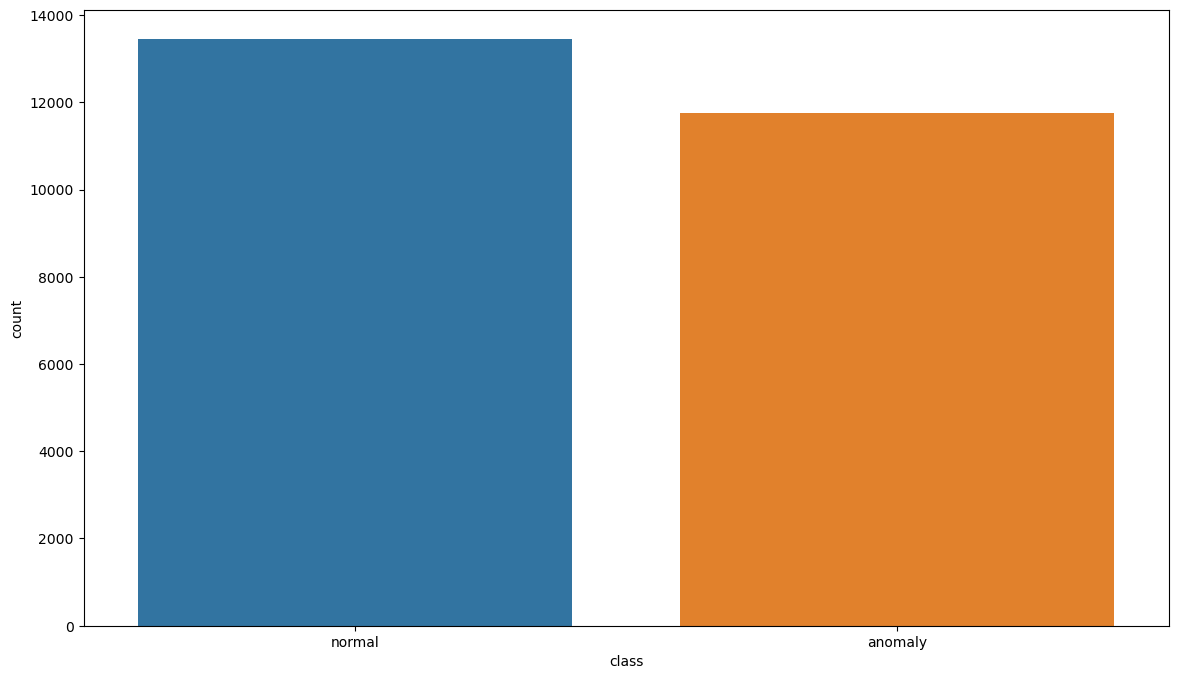

In [22]:
sns.countplot(x=train['class'])

In [23]:
print('Class distribution of Training set:')
print(train['class'].value_counts())

Class distribution of Training set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [24]:
print('Protocol distribution of Training set:')
print(train['protocol_type'].value_counts())

Protocol distribution of Training set:
tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64


In [25]:
print('Protocol distribution of Training set:')
print(train['service'].value_counts())

Protocol distribution of Training set:
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64


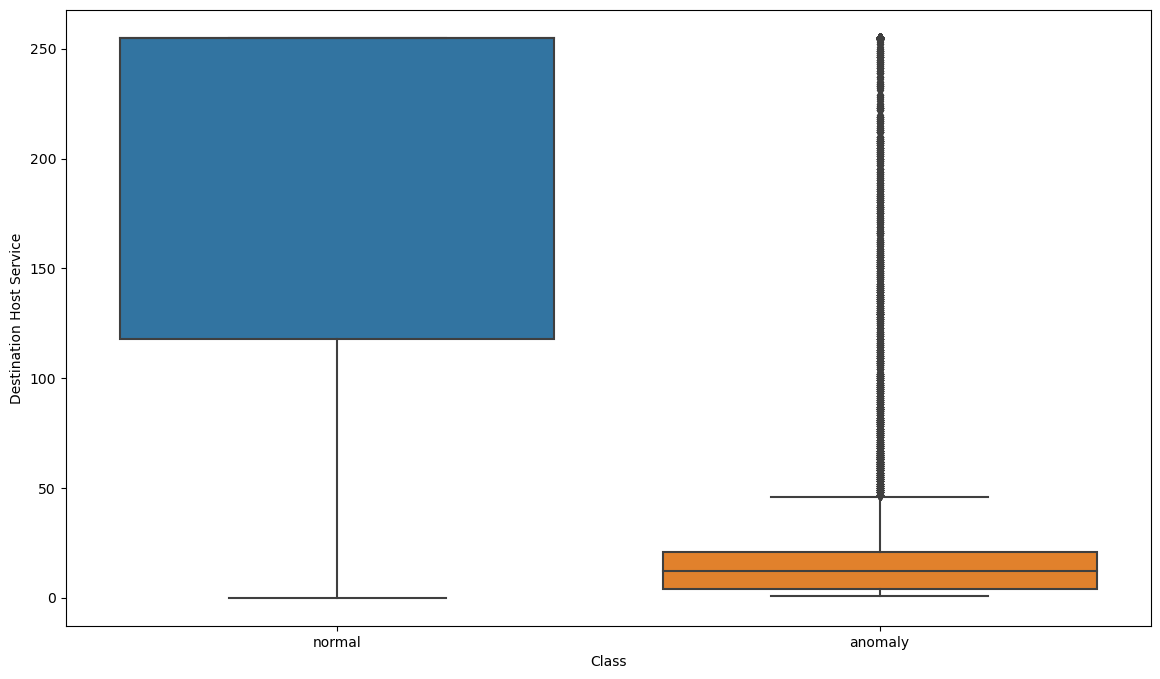

In [26]:
sns.boxplot(x='class', y='dst_host_srv_count', data=train)
plt.xlabel('Class')
plt.ylabel('Destination Host Service')
plt.show()

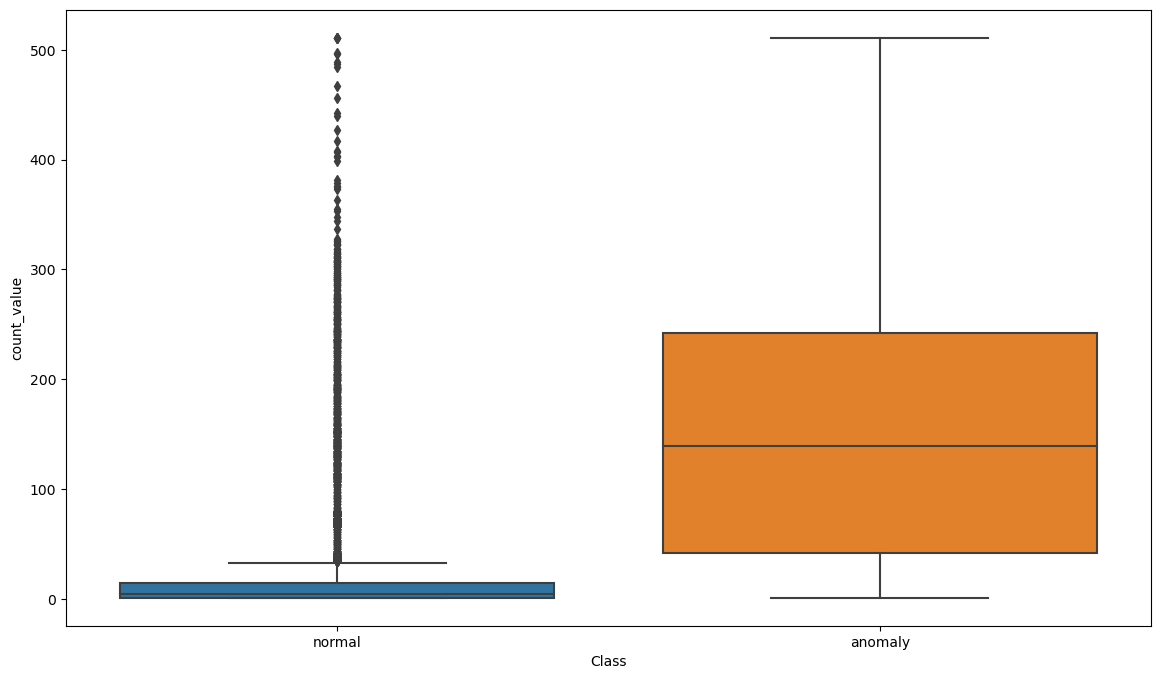

In [27]:
sns.boxplot(x='class', y='count', data=train)
plt.xlabel('Class')
plt.ylabel('count_value')
plt.show()

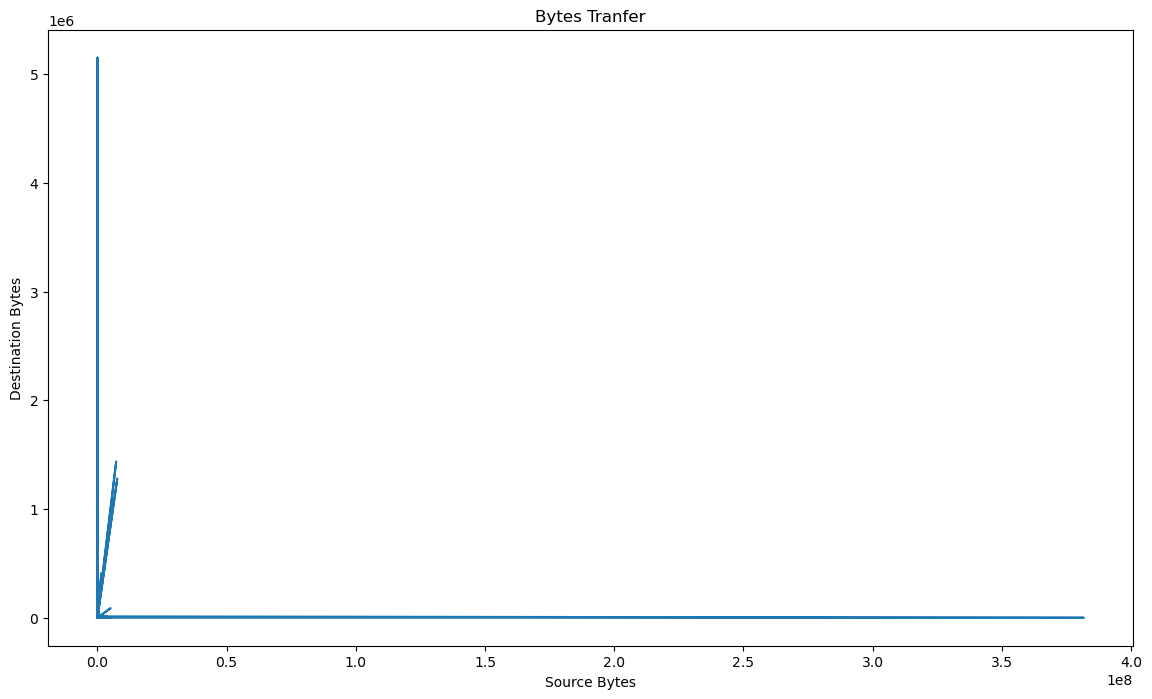

In [28]:
#Line Graph
x_val=train['src_bytes']
y_val=train['dst_bytes']
plt.plot(x_val,y_val,label='Line Graph')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.title('Bytes Tranfer')
plt.show()

In [29]:
print('Class distribution of Training set:')
print(train['class'].value_counts())

Class distribution of Training set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [30]:
#Encode categories variable into Dataframe for training and testing of data

In [31]:
def encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

encode(train)
encode(test)
#train.to_csv('train_encoded.csv', index=False)
#test.to_csv('test_encoded.csv', index=False)

In [32]:
# Select the 'service' and 'flag' columns
col = train[['service', 'flag']]

# Create a label encoder
le = LabelEncoder()

# Fit the label encoder to the 'service' column
le.fit(col['service'])

# Transform the 'service' column to numeric values
col['service'] = le.transform(col['service'])

# Fit the label encoder to the 'flag' column
le.fit(col['flag'])

# Transform the 'flag' column to numeric values
col['flag'] = le.transform(col['flag'])

# Replace the original columns with the numeric columns
train[['service', 'flag']] = col

C:\Users\sonal mishra\AppData\Local\Temp\ipykernel_28644\1569942987.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['service'] = le.transform(col['service'])
C:\Users\sonal mishra\AppData\Local\Temp\ipykernel_28644\1569942987.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['flag'] = le.transform(col['flag'])


In [33]:
# Data Balancing Using Undersampling

In [34]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X_train = train.drop('class', axis=1)
Y_train = train['class']

# Apply Random Under-Sampling for undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = undersampler.fit_resample(X_train, Y_train)

# Apply SMOTE (Synthetic Minority Over-sampling Technique) for oversampling
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)


In [35]:
X_resampled.shape,Y_resampled.shape

((26898, 41), (26898,))

In [36]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y_train)))
print('Resampled dataset shape {}'.format(Counter(Y_resampled)))

Original dataset shape Counter({1: 13449, 0: 11743})
Resampled dataset shape Counter({1: 13449, 0: 13449})


<Figure size 100x100 with 0 Axes>

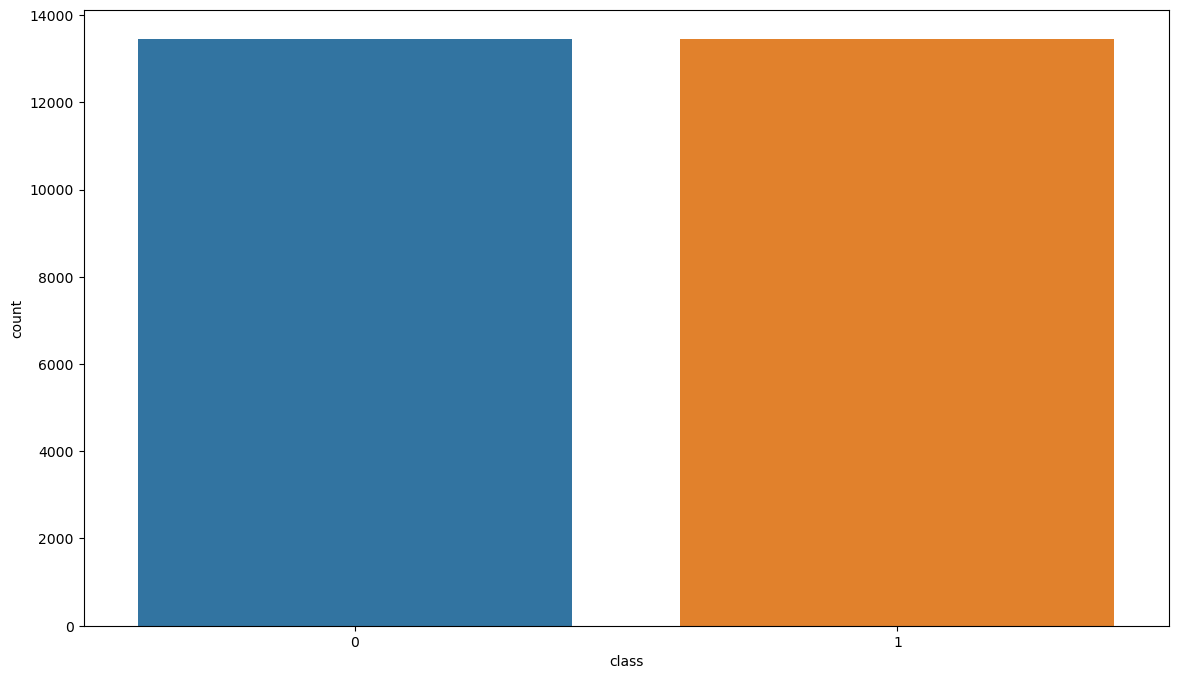

<Figure size 100x100 with 0 Axes>

In [37]:
sns.countplot(x=Y_resampled)
plt.figure(figsize=(1, 1))

In [38]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [39]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,40,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [40]:

# Create a linear regression model
model = RandomForestRegressor()

# Create the RFE model and select the top 5 features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_resampled, Y_resampled)

# Print the ranking of each feature
print('Ranking of each feature:')
print(rfe.ranking_)
selected_features=X_resampled.columns[rfe.support_]
# Print the top 5 important features
print('Top 5 important features:')
print(selected_features)

Ranking of each feature:
[ 8  1  3 14  1  1 33 32 35  1 29  5 30 26 31 18 23 34 27 36 37 25  9 17
 24 21 20 28 19 16 22 15  1  6 10  4  7 13 11 12  2]
Top 5 important features:
Index(['protocol_type', 'src_bytes', 'dst_bytes', 'hot', 'dst_host_srv_count'], dtype='object')


In [40]:
#Random Forest Classifier Feature selection Model  (For Paper Purpose)

In [40]:
#With Five Features
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=5)
rfe = rfe.fit(X_resampled, Y_resampled)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_resampled.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['flag', 'src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_same_srv_rate']

In [41]:
#With 7 Features
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=7)
rfe = rfe.fit(X_resampled, Y_resampled)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_resampled.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'dst_host_srv_count']

In [40]:
#With 10 Features
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_resampled, Y_resampled)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_resampled.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

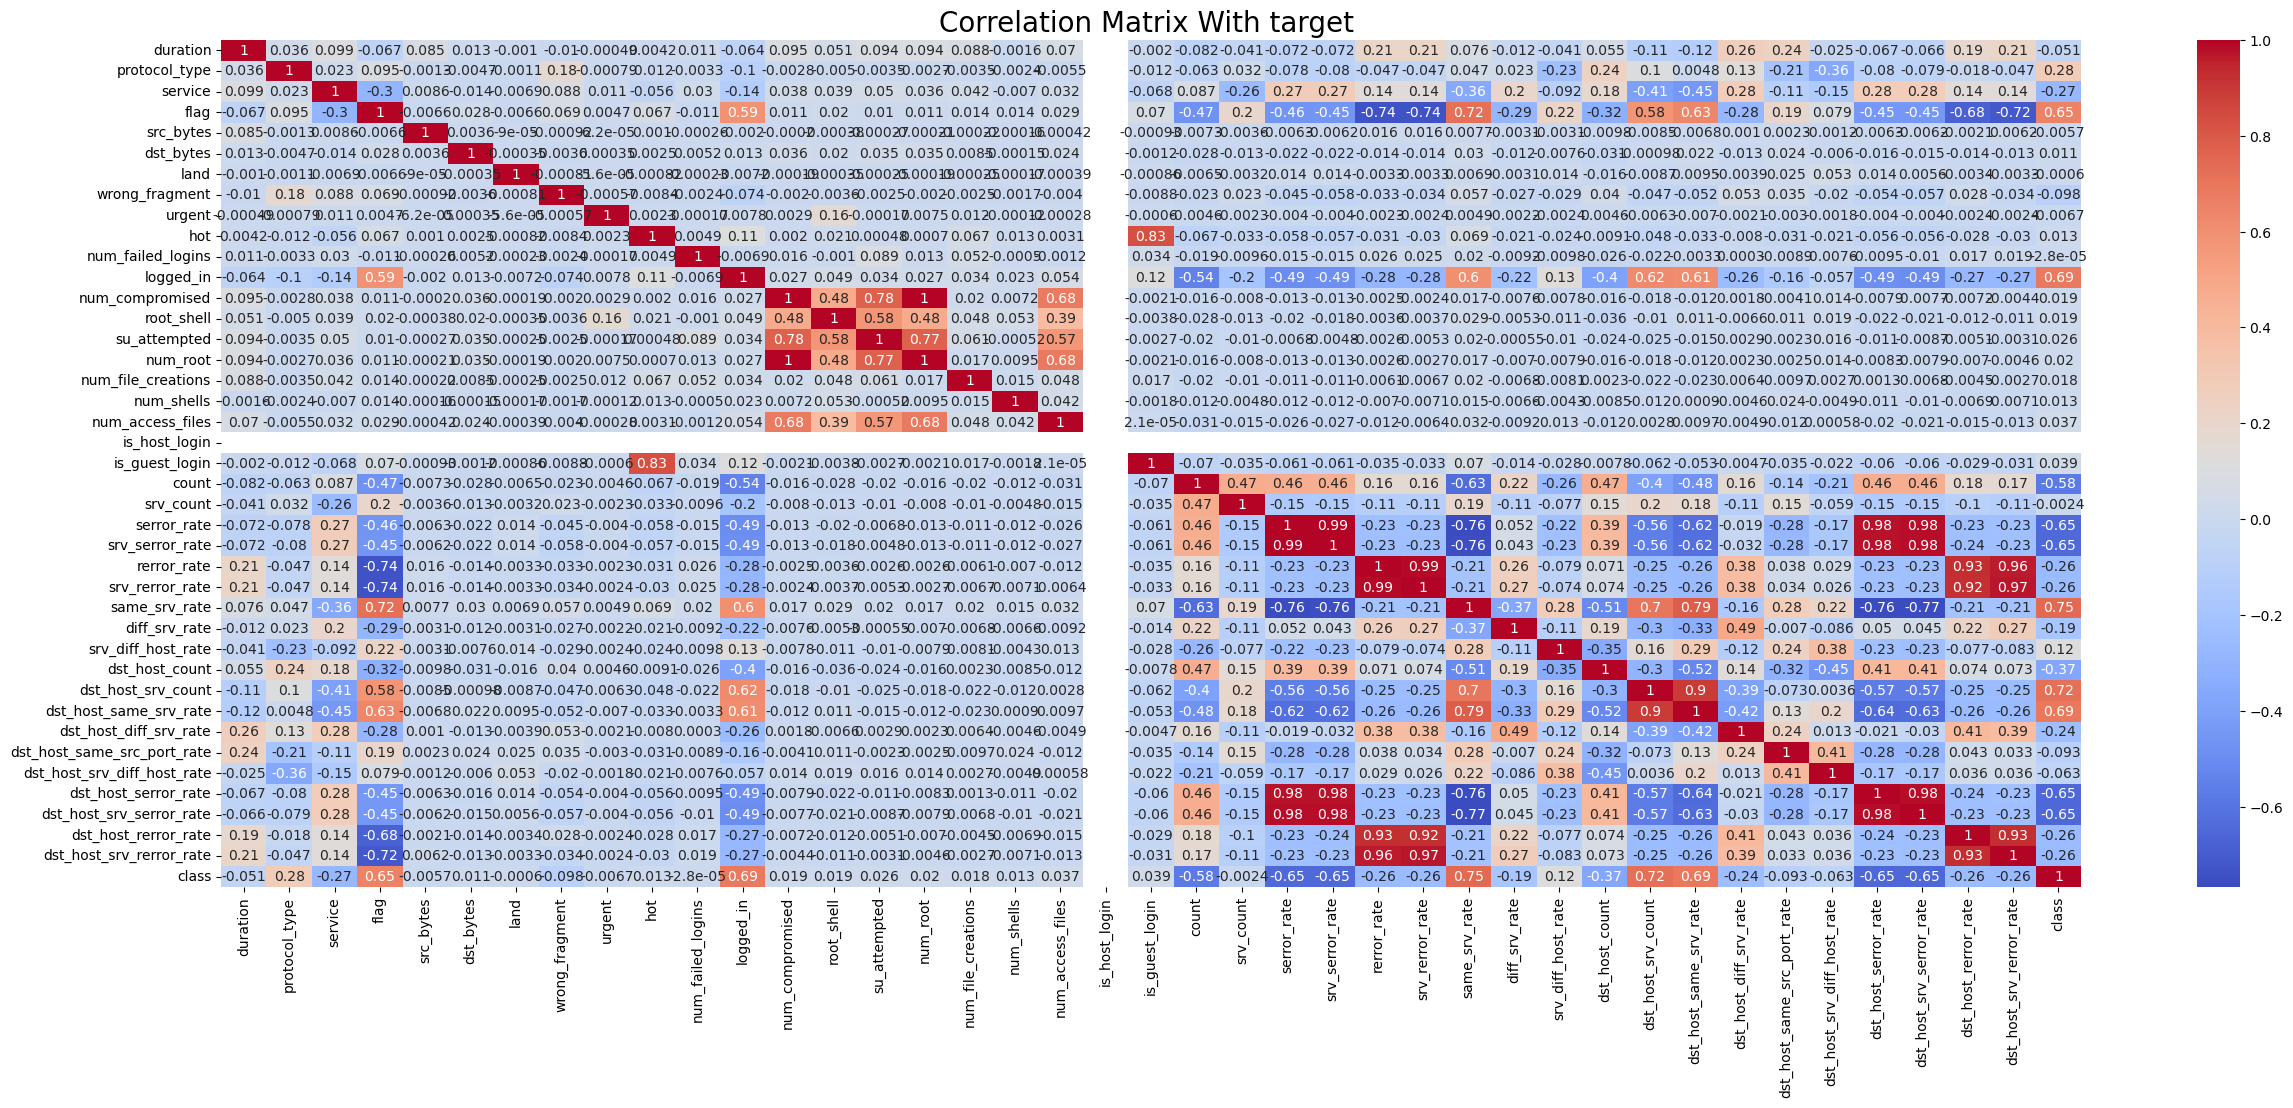

class                          1.000000
same_srv_rate                  0.749237
dst_host_srv_count             0.719292
dst_host_same_srv_rate         0.692212
logged_in                      0.688084
flag                           0.651309
protocol_type                  0.283653
srv_diff_host_rate             0.120649
is_guest_login                 0.038662
num_access_files               0.036999
su_attempted                   0.025851
num_root                       0.019753
num_compromised                0.018620
root_shell                     0.018579
num_file_creations             0.018322
num_shells                     0.013454
hot                            0.012839
dst_bytes                      0.010949
num_failed_logins             -0.000028
land                          -0.000605
srv_count                     -0.002370
src_bytes                     -0.005743
urgent                        -0.006743
duration                      -0.050901
dst_host_srv_diff_host_rate   -0.062928


In [41]:
# Corelation Performance
corr_matrix = train.corr()
# Get the correlation of each feature with the target variable
correlation_with_target = corr_matrix['class'].sort_values(ascending=False)
# Plot the correlation matrix
plt.figure(figsize=(30, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix With target ', fontsize=20)
plt.show()
#plt.savefig('correlation_matrix.png')
# Print the correlation of each feature with the target variable
print(correlation_with_target)




In [42]:
X_resampled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,40,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [43]:
Y_resampled.head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int32

In [44]:
X_resampled = X_resampled[selected_features]

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [129]:
x_train.shape

(18828, 5)

In [130]:
x_test.shape

(8070, 5)

In [131]:
y_train.shape

(18828,)

In [132]:
y_test.shape

(8070,)

In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [134]:
# Logistic Regression

In [137]:
log_reg = LogisticRegression(max_iter = 1000)
#log_reg=LogisticRegression(penalty='l1', C=0.5, solver='liblinear', max_iter=130000)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
lr_tran=accuracy_score(y_train, log_reg.predict(x_train))
lr_test=accuracy_score(y_test, y_pred)
print("Logistic Regression Training Accuracy: ", lr_tran)
print("Logistic Regression Testing Accuracy: ", lr_test)

Logistic Regression Training Accuracy:  0.8696090928404504
Logistic Regression Testing Accuracy:  0.8685254027261462


In [138]:
#Decision Tree

In [139]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_train_pred = decision_tree.predict(x_train)
y_pred = decision_tree.predict(x_test)
dt_tran=accuracy_score(y_train,y_train_pred)
dt_test=accuracy_score(y_test, y_pred)
print("Decision Tree Training Accuracy: ",dt_tran )
print("Decision Tree Testing Accuracy: ",dt_test )

Decision Tree Training Accuracy:  0.9951136605056299
Decision Tree Testing Accuracy:  0.9913258983890955


In [140]:
#K Nearest Neighbours

In [141]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
k_tran=accuracy_score(y_train, knn.predict(x_train))
k_test= accuracy_score(y_test, y_pred)
print("KNN Training Accuracy: ",k_tran)
print("KNN Testing Accuracy: ",k_test)

KNN Training Accuracy:  0.9858189929891651
KNN Testing Accuracy:  0.9828996282527881


In [142]:
#SVM

In [143]:

svm = LinearSVC(C=0.1)
#svm=SVC(kernel='linear',C=0.5)
svm.fit(x_train, y_train)
y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)
sv_tran = accuracy_score(y_train, y_train_pred)
sv_test = accuracy_score(y_test, y_test_pred)

print("SVM Training Accuracy: ", sv_tran)
print("SVM Testing Accuracy: ", sv_test)

C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Training Accuracy:  0.900945400467389
SVM Testing Accuracy:  0.9100371747211896


C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [145]:
data = [["Logistic Regression", lr_tran,lr_test],
        ["Support Vector Machine",sv_tran,sv_test],
        ["K-Neighbors Classifier",k_tran,k_test],
        ["Decision Tree Classifier", dt_tran,dt_test]]
col_names = ["Model Used", "Training Score", "Testing Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════════╤══════════════════╤═════════════════╕
│ Model Used               │   Training Score │   Testing Score │
╞══════════════════════════╪══════════════════╪═════════════════╡
│ Logistic Regression      │         0.869609 │        0.868525 │
├──────────────────────────┼──────────────────┼─────────────────┤
│ Support Vector Machine   │         0.900945 │        0.910037 │
├──────────────────────────┼──────────────────┼─────────────────┤
│ K-Neighbors Classifier   │         0.985819 │        0.9829   │
├──────────────────────────┼──────────────────┼─────────────────┤
│ Decision Tree Classifier │         0.995114 │        0.991326 │
╘══════════════════════════╧══════════════════╧═════════════════╛


In [146]:
SEED = 42

# Support Vector Machine
Model1= LinearSVC()

# KNN
Model2 = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

Model3= LogisticRegression()

# Decision Tree Classifier

Model4= DecisionTreeClassifier()


In [147]:
from sklearn.model_selection import cross_val_score
models = {}
models['K-NeighborsClassifier']= Model2
models['LogisticRegression']= Model3
models['Support Vector Machine']= Model1
models['DecisionTreeClassifier']=Model4

In [148]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

In [149]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

*************** K-NeighborsClassifier Model Validation ***************
Mean precision: 
 98.66 % +- 0.59

Mean recall: 
 97.38 % +- 0.55

**************** LogisticRegression Model Validation ****************
Mean precision: 
 87.61 % +- 1.01

Mean recall: 
 79.08 % +- 1.42

************** Support Vector Machine Model Validation **************
Mean precision: 
 90.72 % +- 5.14

Mean recall: 
 87.76 % +- 5.01

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.66 % +- 0.12

Mean recall: 
 98.64 % +- 0.36



<AxesSubplot:>

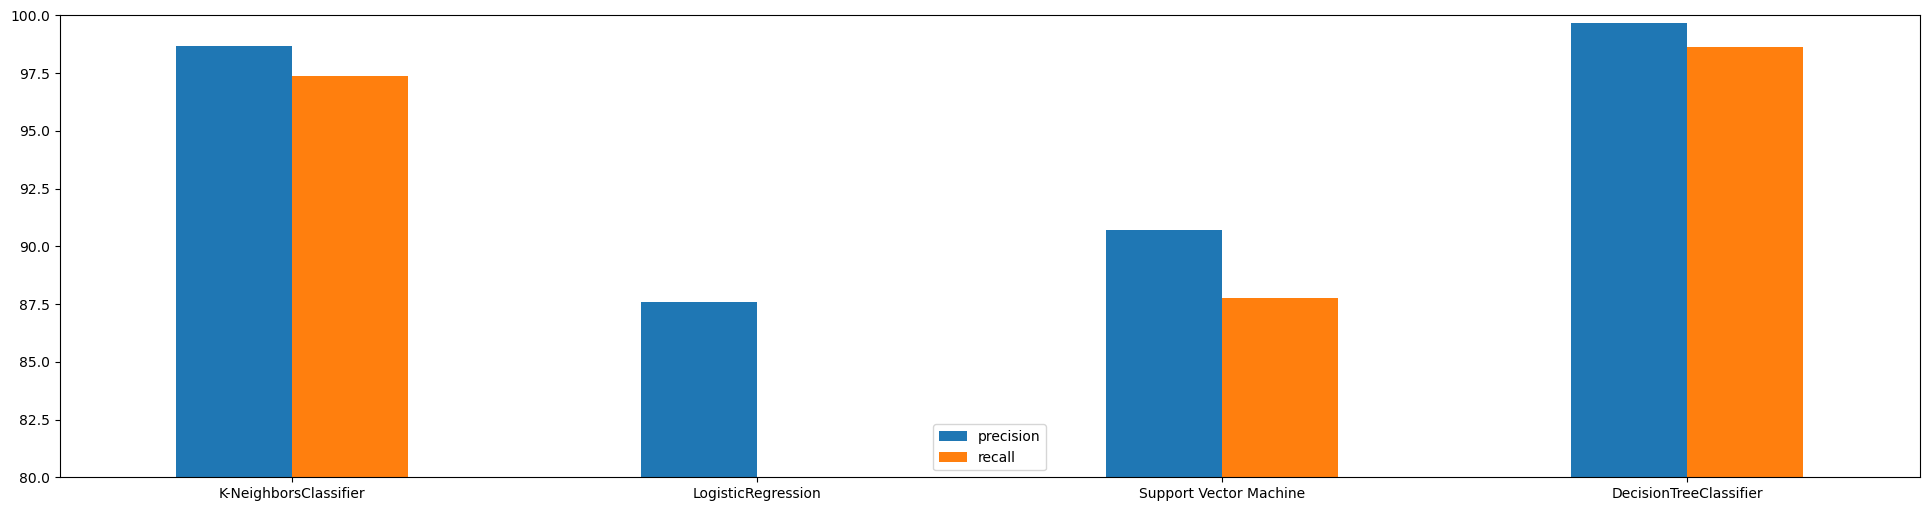

In [150]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [151]:
models = {}
models['K-NeighborsClassifier']= Model2
models['LogisticRegression']= Model3
models['Support Vector Machine']= Model1
models['DecisionTreeClassifier']=Model4

In [152]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Predictions complete.


C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [155]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** K-NeighborsClassifier Model Testing ***************
[[3960   48]
 [  90 3972]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.99      0.98      4008
     anamoly       0.99      0.98      0.98      4062

    accuracy                           0.98      8070
   macro avg       0.98      0.98      0.98      8070
weighted avg       0.98      0.98      0.98      8070

**************** LogisticRegression Model Testing ****************
[[3592  416]
 [ 879 3183]]
----------------
              precision    recall  f1-score   support

      normal       0.80      0.90      0.85      4008
     anamoly       0.88      0.78      0.83      4062

    accuracy                           0.84      8070
   macro avg       0.84      0.84      0.84      8070
weighted avg       0.84      0.84      0.84      8070

************** Support Vector Machine Model Testing **************
[[3910   98]
 [ 604 3458]]
--------------
              p

<AxesSubplot:>

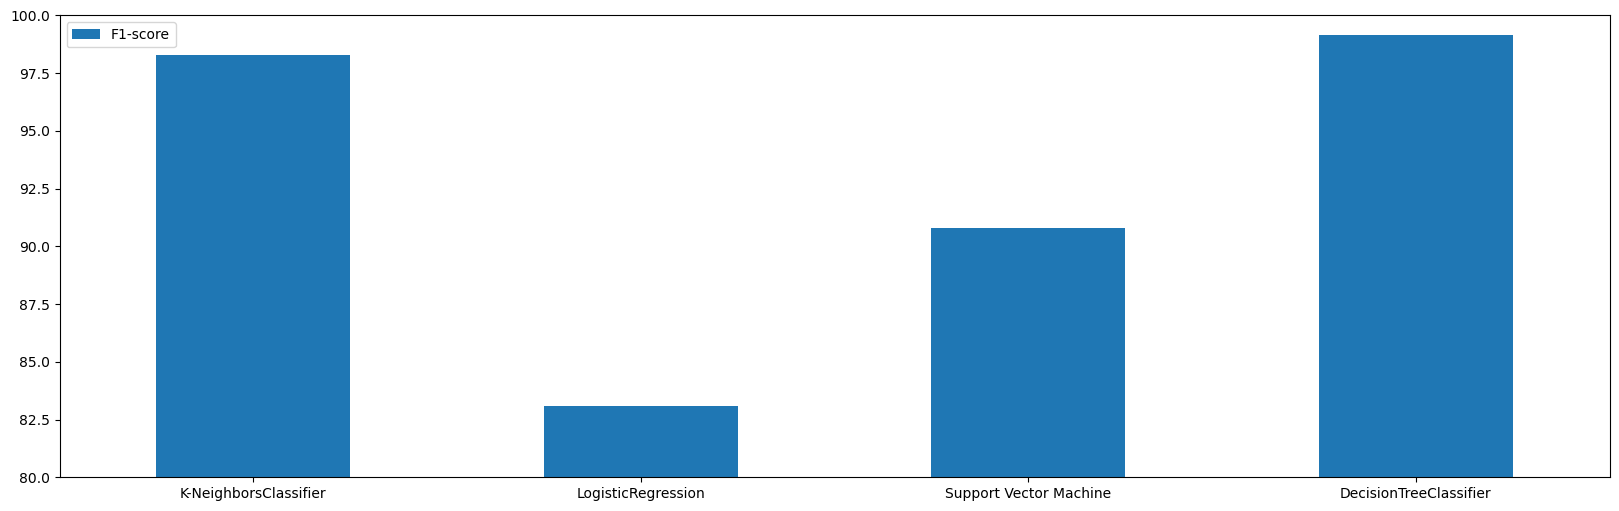

In [156]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(20,6), rot=0)

In [157]:
# Regularization Performance (Mean Squared Error)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('ridge', Ridge(alpha=0.1))
])
pipeline.fit(X_resampled,Y_resampled)
val_predictions = pipeline.predict(x_train)
val_mse = mean_squared_error(y_train, val_predictions)
print("Validation MSE:", val_mse)

test_predictions = pipeline.predict(x_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test MSE:", test_mse)


NameError: name 'Pipeline' is not defined

In [158]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [159]:
Model3 = LogisticRegression()
Model4 = DecisionTreeClassifier()
Model1 = LinearSVC()
Model2 = KNeighborsClassifier()

voting_clf = VotingClassifier(estimators=[('Decision Tree', Model4),("KNN",Model2)], voting='hard')

voting_clf.fit(x_train, y_train)

y_pred = voting_clf.predict(x_test)

In [161]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9852540272614622


In [162]:
import pickle
pickle.dump(voting_clf, open('model8.pkl','wb'))

In [183]:
import pickle
model=pickle.load(open('model8.pkl', 'rb'))
model.fit(x_train, y_train)
input_values= [3,40,45,30,10]

#Prediction
predictions = model.predict([input_values])
print("Normal= 1 && Anomaly= 0")
print("Prediction Result:", predictions)

Normal= 1 && Anomaly= 0
Prediction Result: [0]


C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sonal mishra\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
